# Prosperity Prognosticator: Startup Success Prediction

**Objective:** The goal of this project is to build a machine learning model that can predict whether a startup will be successful or not. We'll be looking at things like funding data, location, category of the startup, etc. to figure out what makes a startup succeed or fail. This could be really useful for investors and entrepreneurs who want to make better decisions.

## 1. Importing Libraries

First, let's import all the libraries we'll need. We're using pandas for data handling, matplotlib/seaborn for plots, and scikit-learn for the ML models.

In [1]:
# importing all the stuff we need
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pickle

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Loading the Dataset

The dataset is from Kaggle - it has info about different startups like their funding, location, category, etc.

**Source:** [Kaggle - Startup Success Prediction](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction)

In [2]:
# loading the dataset
data = pd.read_csv('startup data.csv')
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
# lets see how big the dataset is
print(f"Dataset Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Dataset Shape: (923, 49)
Number of Rows: 923
Number of Columns: 49


In [4]:
# checking data types and stuff
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
# what columns do we have?
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']


In [6]:
# checking for missing values - this is important
print("Missing values in each column:\n")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

Missing values in each column:

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web  

## 3. Exploratory Data Analysis (EDA)

Now let's explore the data visually. I want to understand the distribution of different variables and see if there are any interesting patterns before we start building models.

### 3.1 Univariate & Multivariate Analysis

Here I'm assigning 'other' to the State column first, then mapping the top states (CA, NY, MA, TX, WA) to their actual names. Same thing for category. Then we'll use pie charts to see how the data is distributed across states and categories.

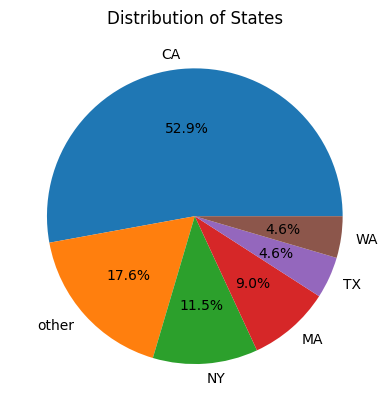

In [7]:
# state distribution pie chart
# first setting everything to 'other' then assigning actual state names for top states
data['State'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'State'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'State'] = 'NY'
data.loc[(data['state_code'] == 'MA'), 'State'] = 'MA'
data.loc[(data['state_code'] == 'TX'), 'State'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'State'] = 'WA'

state_count = data['State'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.title('Distribution of States')
plt.show()

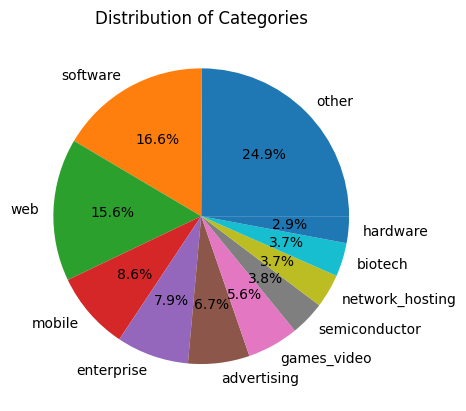

In [8]:
# doing the same thing for categories
data['category'] = 'other'
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

category_count = data['category'].value_counts()
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

#### Startup Status Distribution

Let's see how many startups are successful vs failed in our dataset.

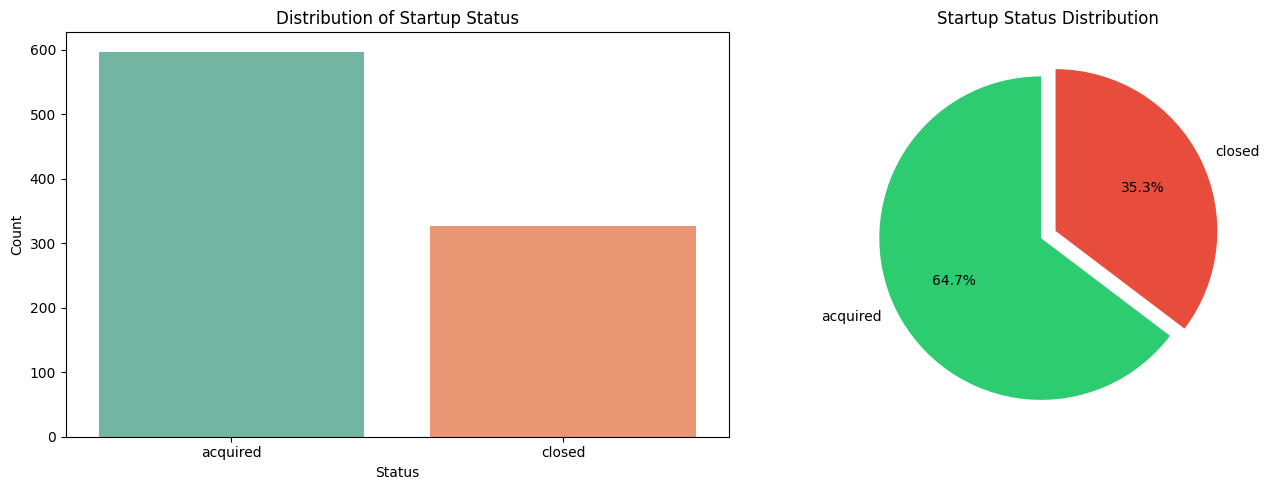

In [9]:
# lets plot the status distribution - both bar and pie
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='status', data=data, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Startup Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')

status_counts = data['status'].value_counts()
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Startup Status Distribution')

plt.tight_layout()
plt.show()

#### State vs Status

Checking if certain states have more successful startups than others.

<Figure size 1200x600 with 0 Axes>

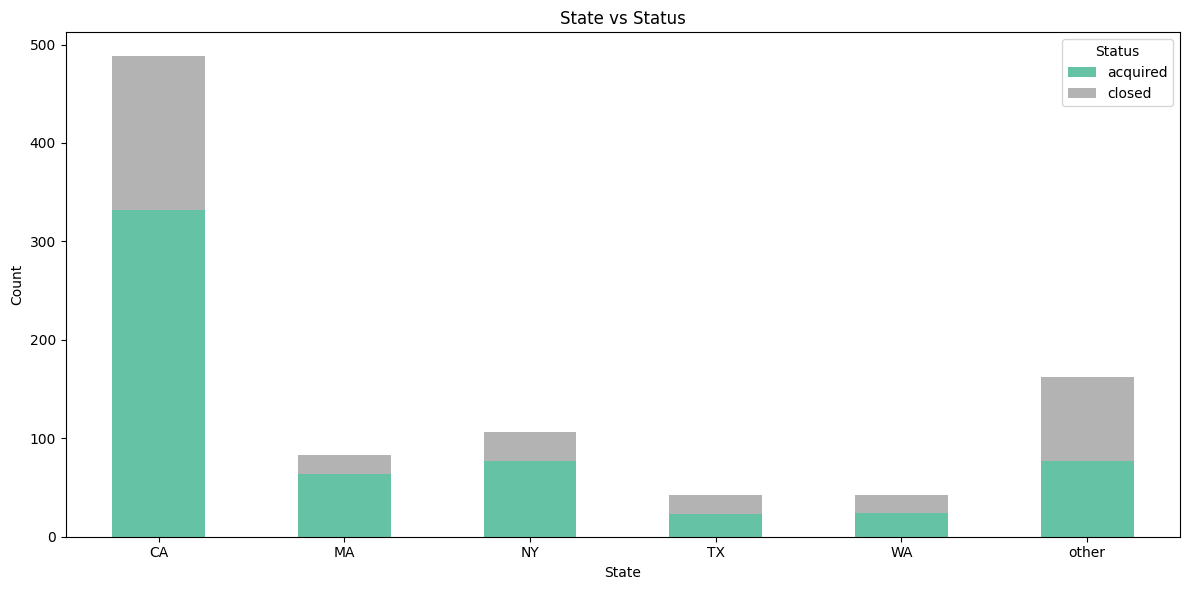

In [10]:
# state vs status - stacked bar chart
plt.figure(figsize=(12, 6))
ct = pd.crosstab(data['State'], data['status'])
ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title('State vs Status')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### State vs Category

Looking at which categories are popular in which states.

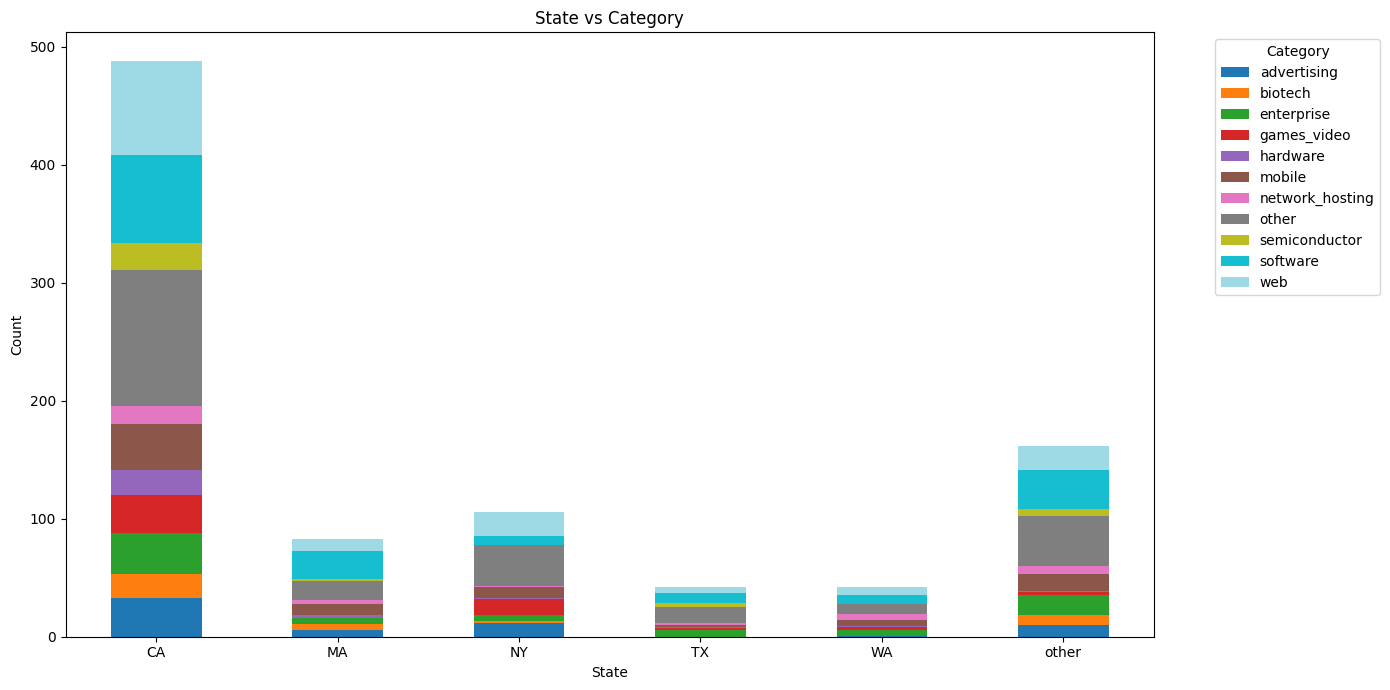

In [11]:
# state vs category
ct2 = pd.crosstab(data['State'], data['category'])
ct2.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 7))
plt.title('State vs Category')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Category vs Founded Year

Let's see how startup categories changed over the years.

<Figure size 1400x700 with 0 Axes>

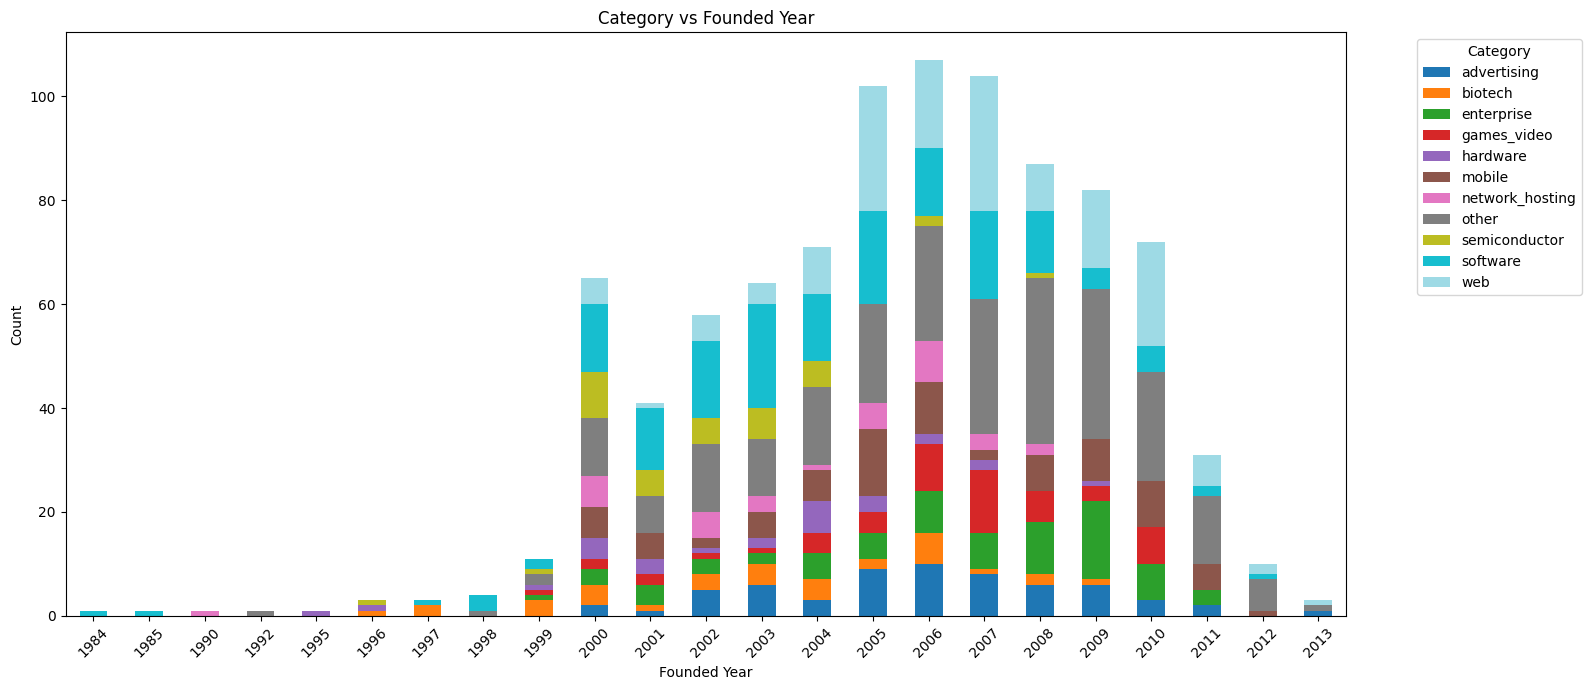

In [12]:
# need to extract founded year from the date first
data['founded_at_dt'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['founded_year'] = data['founded_at_dt'].dt.year

plt.figure(figsize=(14, 7))
ct3 = pd.crosstab(data['founded_year'].dropna().astype(int), data['category'])
ct3.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 7))
plt.title('Category vs Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Founded Year vs Total Funding

Checking if startups founded in certain years got more funding on average.

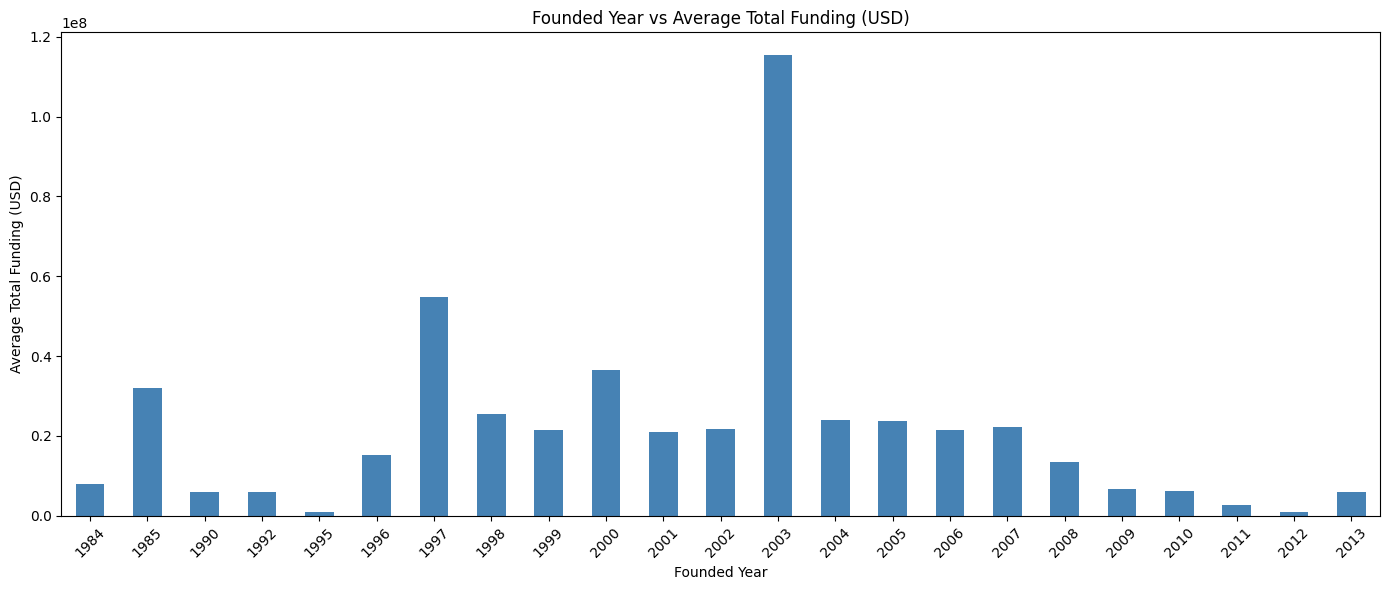

In [13]:
# average funding by year
plt.figure(figsize=(14, 6))
funding_by_year = data.groupby('founded_year')['funding_total_usd'].mean()
funding_by_year.plot(kind='bar', color='steelblue')
plt.title('Founded Year vs Average Total Funding (USD)')
plt.xlabel('Founded Year')
plt.ylabel('Average Total Funding (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Funding Rounds vs Status

This is interesting - let's see if having VC funding, angel investors, or going through different rounds (A, B, C, D) affects success.

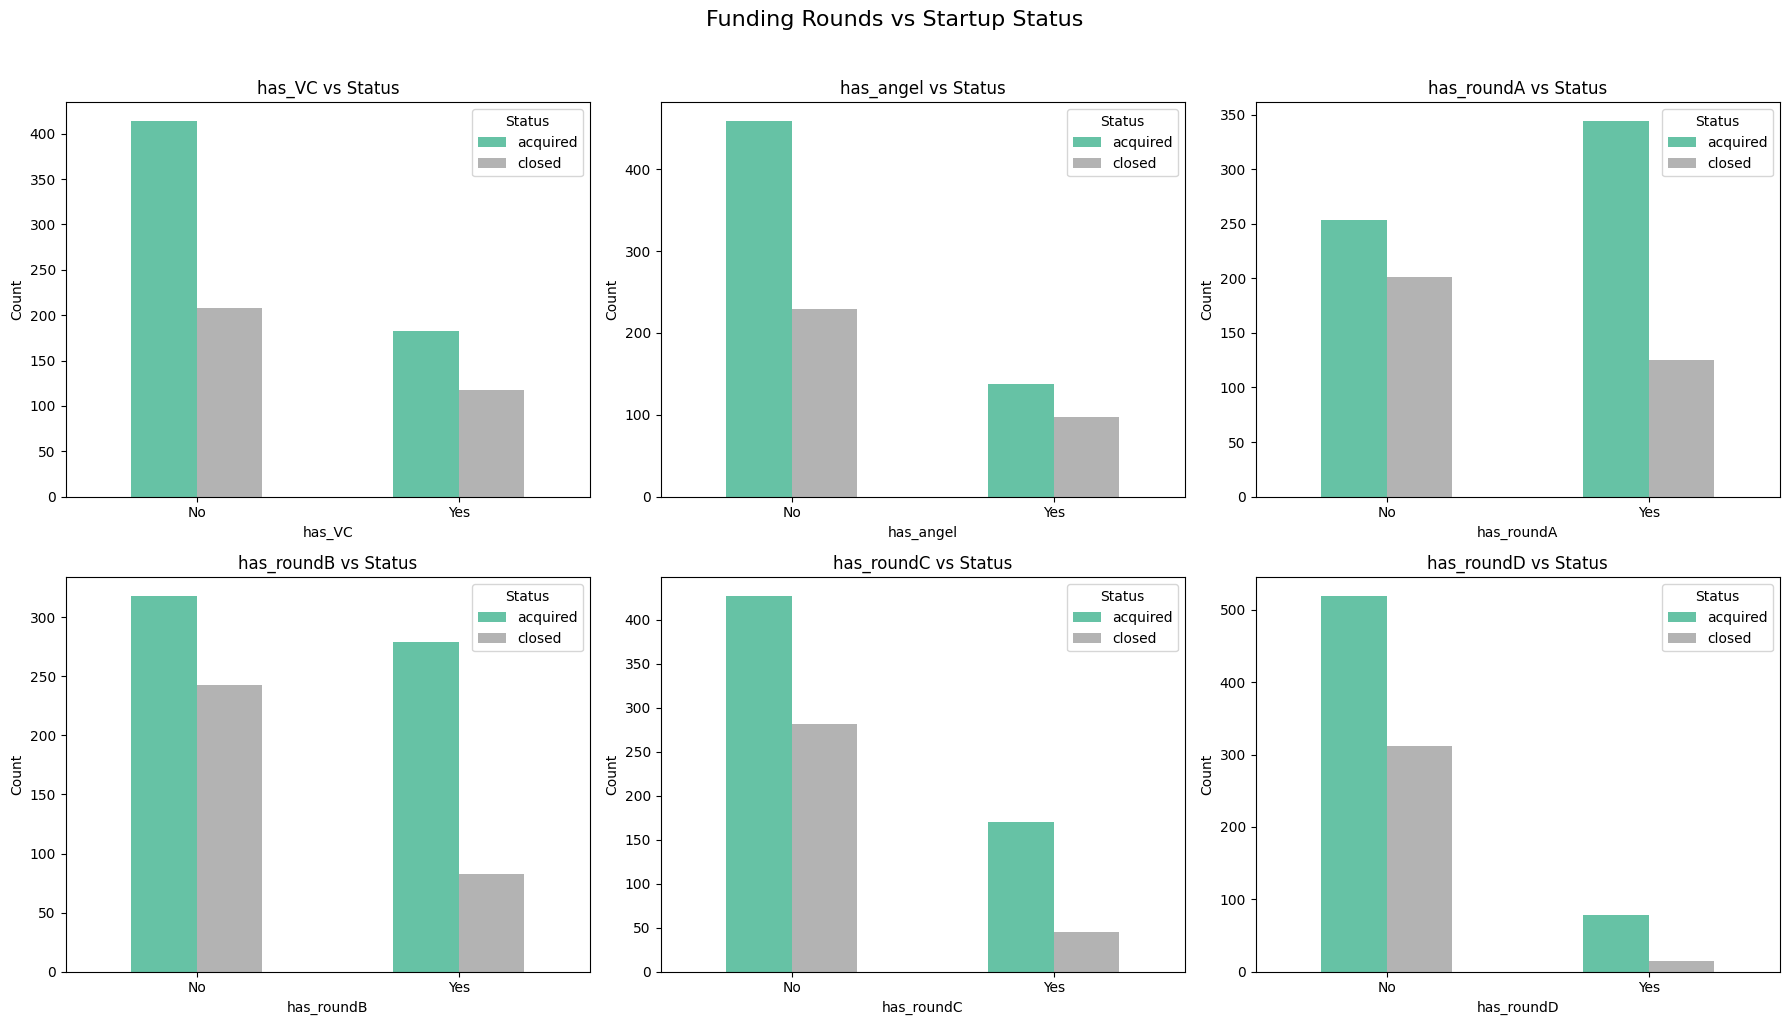

In [14]:
# checking how different funding rounds affect success/failure
funding_cols = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(funding_cols):
    ct_fund = pd.crosstab(data[col], data['status'])
    ct_fund.plot(kind='bar', ax=axes[idx], colormap='Set2', legend=True)
    axes[idx].set_title(f'{col} vs Status')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticklabels(['No', 'Yes'], rotation=0)
    axes[idx].legend(title='Status')

plt.suptitle('Funding Rounds vs Startup Status', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### 3.2 Statistical Analysis

Let's look at the basic statistics and the correlation between variables.

In [15]:
# basic descriptive stats
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_at_dt,founded_year
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,2005-09-10 00:57:43.488624128,2005.496208
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1984-01-01 00:00:00,1984.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,2003-01-01 00:00:00,2003.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,2006-01-01 00:00:00,2006.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,2008-04-01 00:00:00,2008.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,2013-04-16 00:00:00,2013.000000
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,NaN,3.528738


#### Correlation Heatmap

This will help us see which features are correlated with each other and with the target variable.

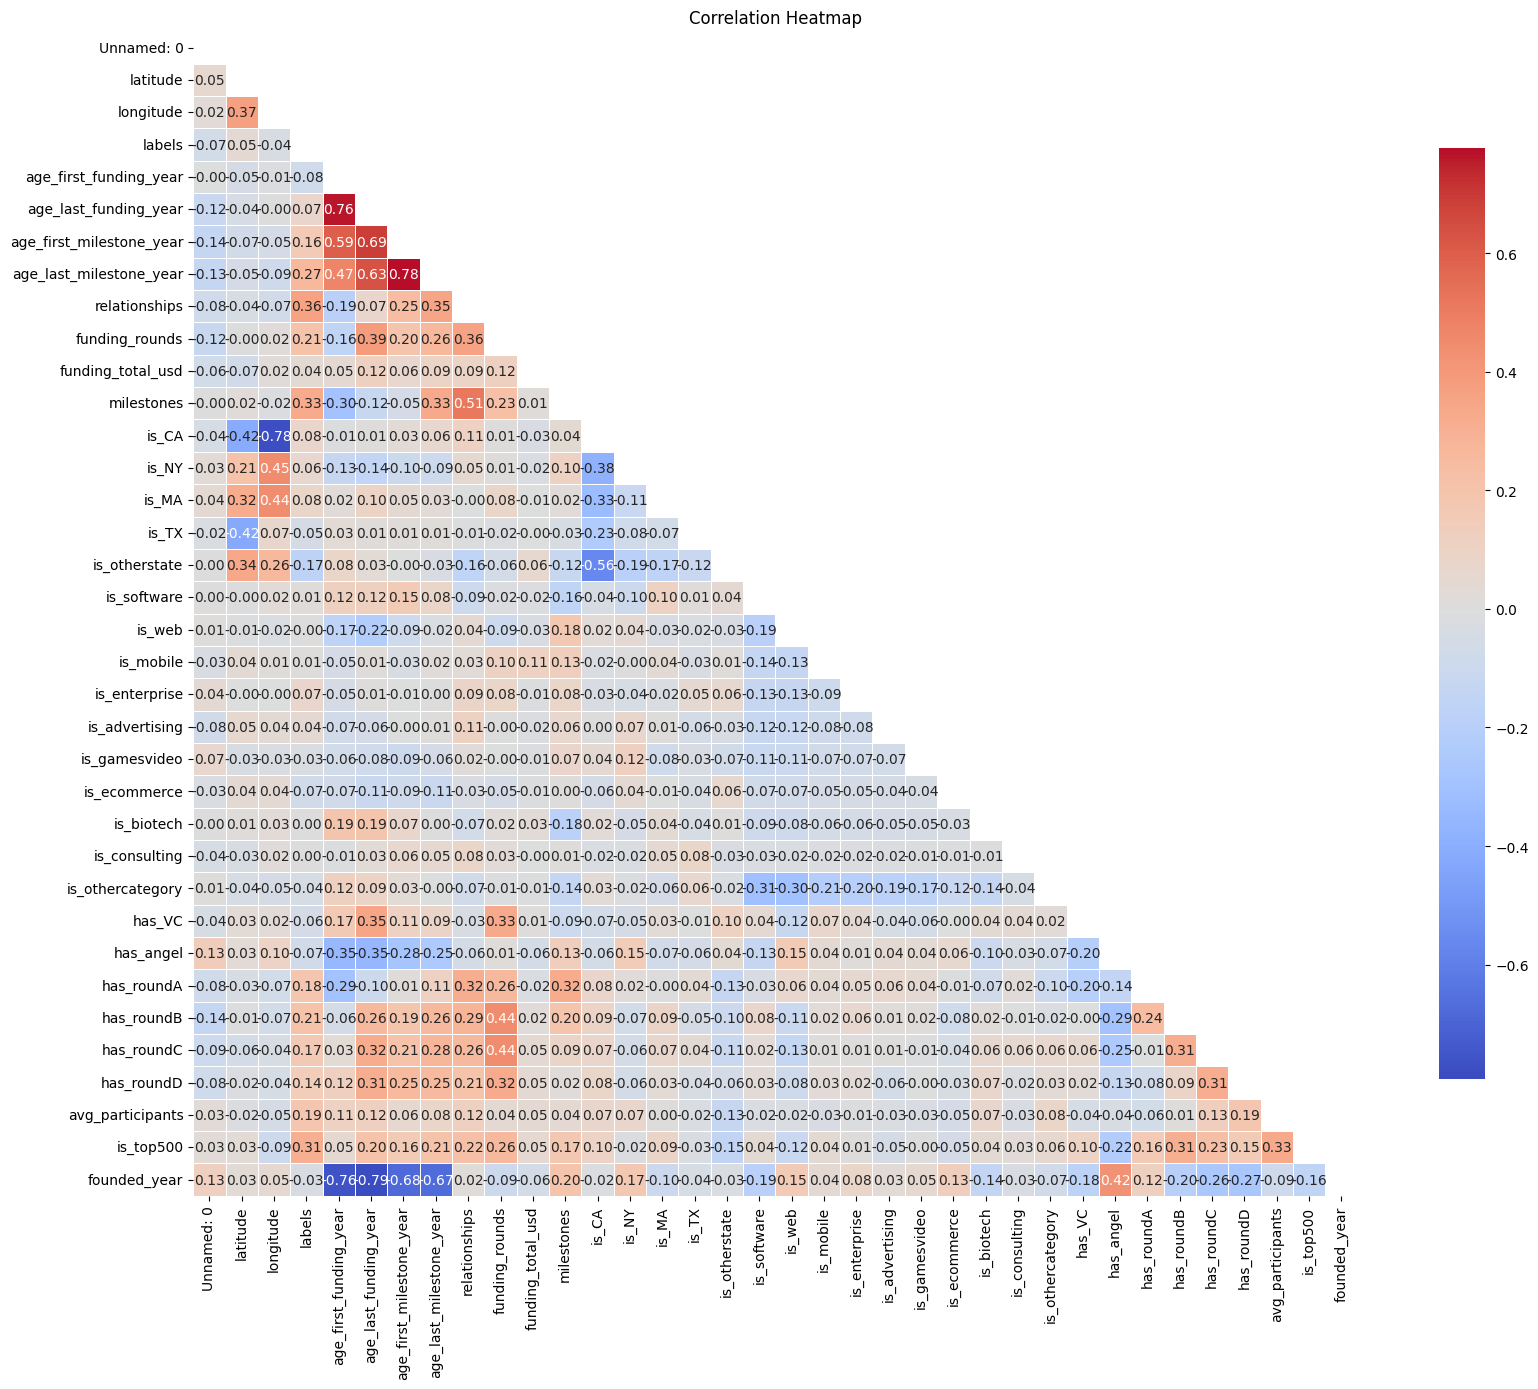

In [16]:
# correlation heatmap - takes a bit to render because of the size
plt.figure(figsize=(18, 14))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 4. Data Pre-processing

### 4.1 Reducing the Number of Categories

**State Code Variable** — First I need to check if `state_code` and `state_code.1` have the same data. Turns out one row is different because `state_code.1` has a missing value there. So I'll go with `state_code` as the correct one (makes sense when you look at the city column too).

**Reducing categories** — The top 5 states (CA, NY, MA, TX, WA) cover more than 80% of the data, so I'll group everything else as 'other'.

In [17]:
# checking if state_code and state_code.1 are the same
print("Are state_code and state_code.1 equal?")
print((data['state_code'] == data['state_code.1']).all())

# finding where they differ
df = data[data['state_code'] != data['state_code.1']]
print(f"\nRows where they differ: {len(df)}")
# looks like state_code.1 has a missing value so we'll use state_code
df[['state_code', 'state_code.1', 'city']]

Are state_code and state_code.1 equal?
False

Rows where they differ: 1


,state_code,state_code.1,city
515,CA,NaN,Menlo Park


In [18]:
# checking how much of the data the top states cover
state = data['state_code'].value_counts().reset_index()
state.columns = ['state_code', 'count']
state['proportion'] = (state['count'] / state['count'].sum() * 100).round(2)
print("State Distribution:")
print(state.to_string(index=False))
print(f"\nTop 5 states cover: {state.head(5)['proportion'].sum():.2f}% of data")
# yep, more than 80% - so grouping rest as 'other' makes sense

State Distribution:
state_code  count  proportion
        CA    488       52.87
        NY    106       11.48
        MA     83        8.99
        WA     42        4.55
        TX     42        4.55
        CO     19        2.06
        IL     18        1.95
        PA     17        1.84
        VA     13        1.41
        GA     11        1.19
        NC      7        0.76
        OR      7        0.76
        NJ      7        0.76
        MD      7        0.76
        FL      6        0.65
        OH      6        0.65
        MN      5        0.54
        CT      4        0.43
        DC      4        0.43
        UT      3        0.33
        TN      3        0.33
        RI      3        0.33
        MI      3        0.33
        KY      2        0.22
        ME      2        0.22
        NH      2        0.22
        MO      2        0.22
        IN      2        0.22
        NV      2        0.22
        AZ      2        0.22
        WV      1        0.11
        NM      1   

### 4.2 Dropping Irrelevant Columns

Now I need to remove columns that won't help with prediction - stuff like names, IDs, dates, and the temporary columns I created during EDA. Also removing the individual category indicator columns since we already categorized them.

In [19]:
# dropping all the columns we dont need for the model
columns_to_drop = [
    'Unnamed: 0', 'Unnamed: 6', 'id', 'zip_code', 'name', 'labels', 'object_id',
    'city', 'state_code', 'state_code.1',
    'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
    'category_code',
    'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
    'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
    'State', 'category', 'founded_at_dt', 'founded_year'
]

# only drop the ones that actually exist (in case some were already removed)
existing_cols = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=existing_cols)

print(f"Dropped {len(existing_cols)} columns")
print(f"\nRemaining columns ({len(data.columns)}):")
print(data.columns.tolist())
data.head()

Dropped 29 columns

Remaining columns (24):
['latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']


,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,1,0,0,0,0,1.0000,0,acquired
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [20]:
# handling missing values
print(f"Missing values before:\n{data.isnull().sum()}\n")

# filling numeric nulls with median and dropping remaining rows
data = data.fillna(data.median(numeric_only=True))
data = data.dropna()

# encoding target: acquired = 1 (success), closed = 0 (failure)
data['status'] = data['status'].map({'acquired': 1, 'closed': 0})

print(f"Shape after cleaning: {data.shape}")
print(f"Missing values left: {data.isnull().sum().sum()}")
data.head()

Missing values before:
latitude                      0
longitude                     0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status                        0
dtype: int64

Shape after cleaning: (923, 24)
Missing values left: 0


,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,1,0,0,0,0,1.0000,0,1
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


## 5. Train-Test Split

Splitting the data into training (70%) and testing (30%) sets. Using `random_state=116` so the results are reproducible. Also using stratify to keep the class distribution balanced in both sets.

In [21]:
# separating features and target
X = data.drop('status', axis=1)
y = data['status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

# scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# splitting into train and test - 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=116, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Features shape: (923, 23)
Target shape: (923,)

Feature columns: ['latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

Training set size: 646
Testing set size: 277


## 6. Model Building

### 6.1 Evaluation Function

Creating a function that will evaluate each model with accuracy, precision, recall, F1-score and also show the confusion matrix. This way I don't have to write the same code for every model.

In [22]:
# function to evaluate models - saves me from repeating the same code
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    print(f"\n{'='*50}")
    print(f"  {model_name}")
    print(f"{'='*50}")
    print(f"  Train Accuracy : {train_accuracy:.4f}")
    print(f"  Test Accuracy  : {test_accuracy:.4f}")
    print(f"  Precision      : {precision:.4f}")
    print(f"  Recall         : {recall:.4f}")
    print(f"  F1-Score       : {f1:.4f}")
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Failed', 'Success'], yticklabels=['Failed', 'Success'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return {
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

print("Evaluation function ready!")

Evaluation function ready!


### 6.2 Training Multiple Models

Going to try 4 different algorithms and see which one performs best:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Tree
4. Random Forest


  Logistic Regression
  Train Accuracy : 0.7570
  Test Accuracy  : 0.7329
  Precision      : 0.7245
  Recall         : 0.7329
  F1-Score       : 0.7203

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        98
           1       0.75      0.87      0.81       179

    accuracy                           0.73       277
   macro avg       0.71      0.68      0.68       277
weighted avg       0.72      0.73      0.72       277



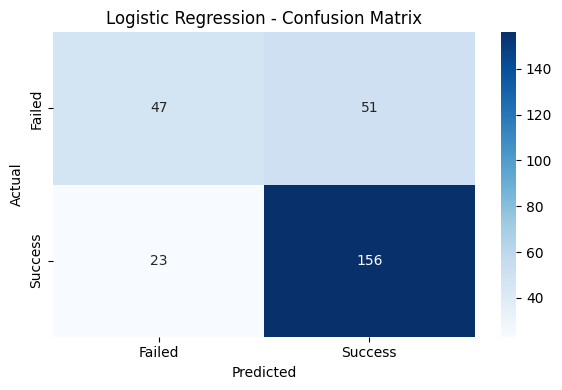

In [23]:
results = []

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_results = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")
results.append(lr_results)


  Support Vector Machine
  Train Accuracy : 0.8282
  Test Accuracy  : 0.7437
  Precision      : 0.7375
  Recall         : 0.7437
  F1-Score       : 0.7298

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        98
           1       0.76      0.89      0.82       179

    accuracy                           0.74       277
   macro avg       0.73      0.68      0.69       277
weighted avg       0.74      0.74      0.73       277



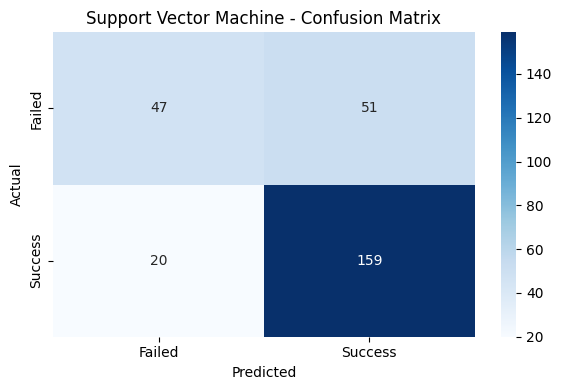

In [24]:
# 2. SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_results = evaluate_model(svm_model, X_train, X_test, y_train, y_test, "Support Vector Machine")
results.append(svm_results)


  Decision Tree
  Train Accuracy : 1.0000
  Test Accuracy  : 0.7148
  Precision      : 0.7078
  Recall         : 0.7148
  F1-Score       : 0.7097

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        98
           1       0.76      0.82      0.79       179

    accuracy                           0.71       277
   macro avg       0.69      0.67      0.68       277
weighted avg       0.71      0.71      0.71       277



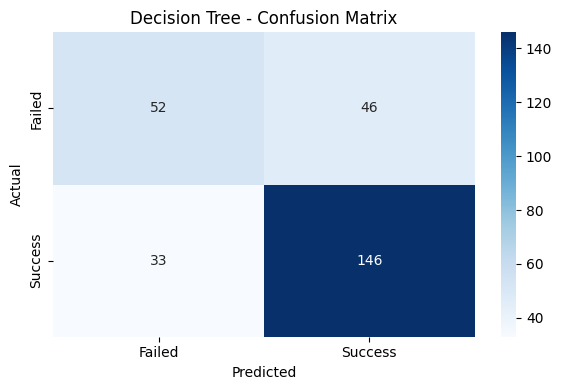

In [25]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")
results.append(dt_results)


  Random Forest
  Train Accuracy : 1.0000
  Test Accuracy  : 0.7870
  Precision      : 0.7890
  Recall         : 0.7870
  F1-Score       : 0.7744

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        98
           1       0.78      0.93      0.85       179

    accuracy                           0.79       277
   macro avg       0.79      0.73      0.74       277
weighted avg       0.79      0.79      0.77       277



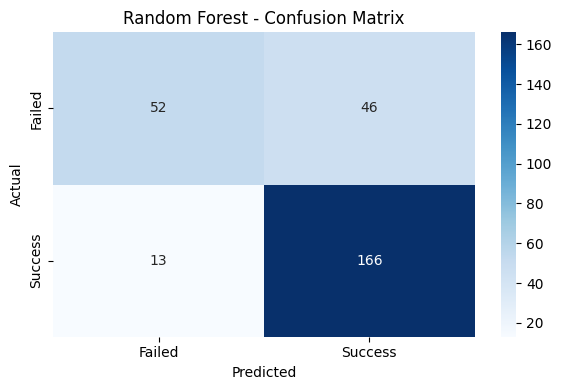

In [26]:
# 4. Random Forest - expecting this one to do the best
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
results.append(rf_results)


  MODEL COMPARISON (Before Tuning)
                 Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
   Logistic Regression        0.756966       0.732852   0.724544 0.732852  0.720279
Support Vector Machine        0.828173       0.743682   0.737454 0.743682  0.729817
         Decision Tree        1.000000       0.714801   0.707825 0.714801  0.709668
         Random Forest        1.000000       0.787004   0.789027 0.787004  0.774431


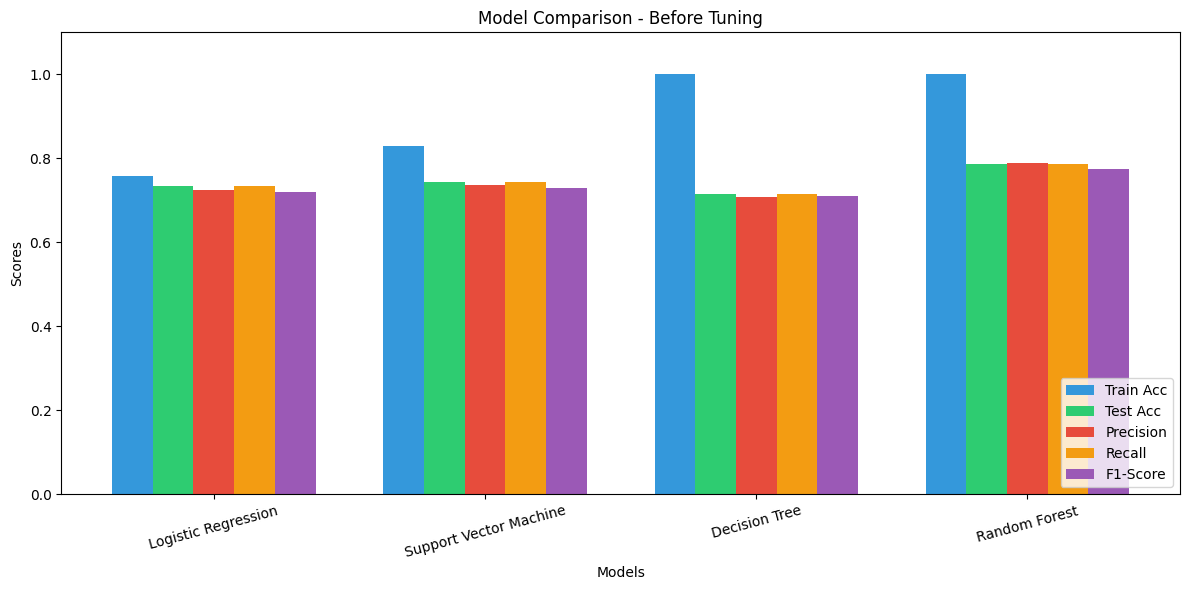

In [27]:
# comparing all models side by side
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("  MODEL COMPARISON (Before Tuning)")
print("="*70)
print(results_df.to_string(index=False))

# bar chart comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.15
ax.bar(x - 2*width, results_df['Train Accuracy'], width, label='Train Acc', color='#3498db')
ax.bar(x - width, results_df['Test Accuracy'], width, label='Test Acc', color='#2ecc71')
ax.bar(x, results_df['Precision'], width, label='Precision', color='#e74c3c')
ax.bar(x + width, results_df['Recall'], width, label='Recall', color='#f39c12')
ax.bar(x + 2*width, results_df['F1-Score'], width, label='F1-Score', color='#9b59b6')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Before Tuning')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=15)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

Now let's try to improve the models by finding the best hyperparameters using GridSearchCV. This basically tries different combinations and picks the one with the best accuracy.

Tuning Logistic Regression...


Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

  Logistic Regression (Tuned)
  Train Accuracy : 0.7539
  Test Accuracy  : 0.7401
  Precision      : 0.7331
  Recall         : 0.7401
  F1-Score       : 0.7266

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.48      0.57        98
           1       0.76      0.88      0.81       179

    accuracy                           0.74       277
   macro avg       0.72      0.68      0.69       277
weighted avg       0.73      0.74      0.73       277



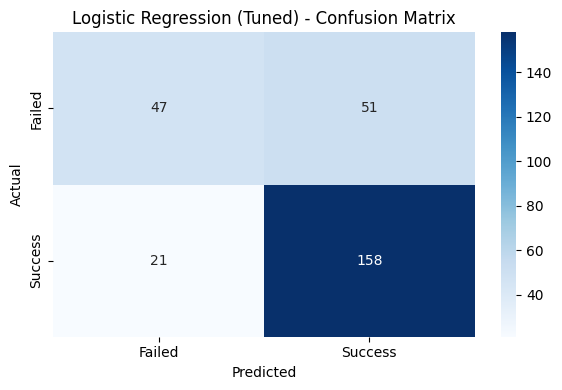

In [28]:
tuned_results = []

# tuning Logistic Regression
print("Tuning Logistic Regression...")
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
print(f"Best params: {lr_grid.best_params_}")
lr_tuned = evaluate_model(lr_grid.best_estimator_, X_train, X_test, y_train, y_test, "Logistic Regression (Tuned)")
tuned_results.append(lr_tuned)

Tuning SVM...


Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

  SVM (Tuned)
  Train Accuracy : 0.7724
  Test Accuracy  : 0.7329
  Precision      : 0.7245
  Recall         : 0.7329
  F1-Score       : 0.7203

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        98
           1       0.75      0.87      0.81       179

    accuracy                           0.73       277
   macro avg       0.71      0.68      0.68       277
weighted avg       0.72      0.73      0.72       277



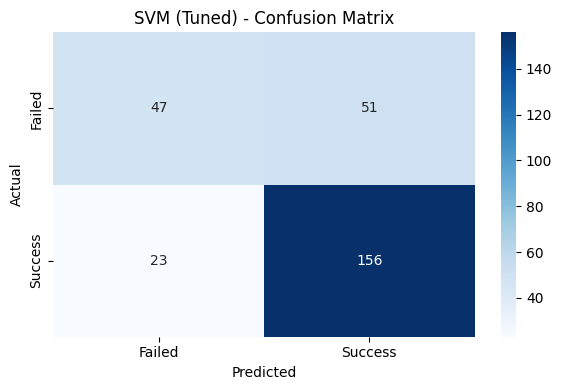

In [29]:
# tuning SVM - this might take a while
print("Tuning SVM...")
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
print(f"Best params: {svm_grid.best_params_}")
svm_tuned = evaluate_model(svm_grid.best_estimator_, X_train, X_test, y_train, y_test, "SVM (Tuned)")
tuned_results.append(svm_tuned)

Tuning Decision Tree...


Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

  Decision Tree (Tuned)
  Train Accuracy : 0.8173
  Test Accuracy  : 0.7256
  Precision      : 0.7171
  Recall         : 0.7256
  F1-Score       : 0.7173

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        98
           1       0.76      0.84      0.80       179

    accuracy                           0.73       277
   macro avg       0.70      0.68      0.68       277
weighted avg       0.72      0.73      0.72       277



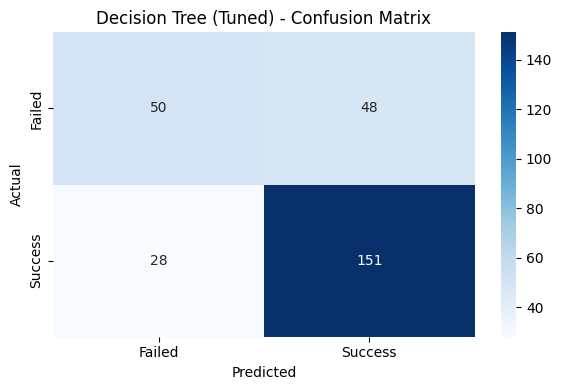

In [30]:
# tuning Decision Tree
print("Tuning Decision Tree...")
dt_params = {'max_depth': [3, 5, 10, 15, None], 'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print(f"Best params: {dt_grid.best_params_}")
dt_tuned = evaluate_model(dt_grid.best_estimator_, X_train, X_test, y_train, y_test, "Decision Tree (Tuned)")
tuned_results.append(dt_tuned)

Tuning Random Forest...


Best params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

  Random Forest (Tuned)
  Train Accuracy : 0.9628
  Test Accuracy  : 0.7798
  Precision      : 0.7821
  Recall         : 0.7798
  F1-Score       : 0.7657

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        98
           1       0.78      0.93      0.84       179

    accuracy                           0.78       277
   macro avg       0.78      0.72      0.73       277
weighted avg       0.78      0.78      0.77       277



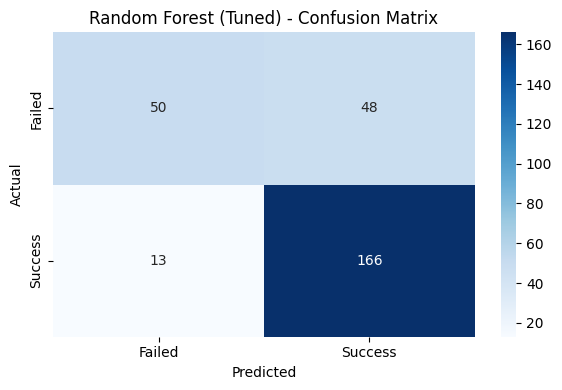

In [31]:
# tuning Random Forest
print("Tuning Random Forest...")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, None],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print(f"Best params: {rf_grid.best_params_}")
rf_tuned = evaluate_model(rf_grid.best_estimator_, X_train, X_test, y_train, y_test, "Random Forest (Tuned)")
tuned_results.append(rf_tuned)

### 7.1 Before vs After Tuning Comparison

Let's see if the hyperparameter tuning actually helped improve the models.


  After Hyperparameter Tuning
                      Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
Logistic Regression (Tuned)        0.753870       0.740072   0.733054 0.740072  0.726634
                SVM (Tuned)        0.772446       0.732852   0.724544 0.732852  0.720279
      Decision Tree (Tuned)        0.817337       0.725632   0.717129 0.725632  0.717301
      Random Forest (Tuned)        0.962848       0.779783   0.782051 0.779783  0.765653


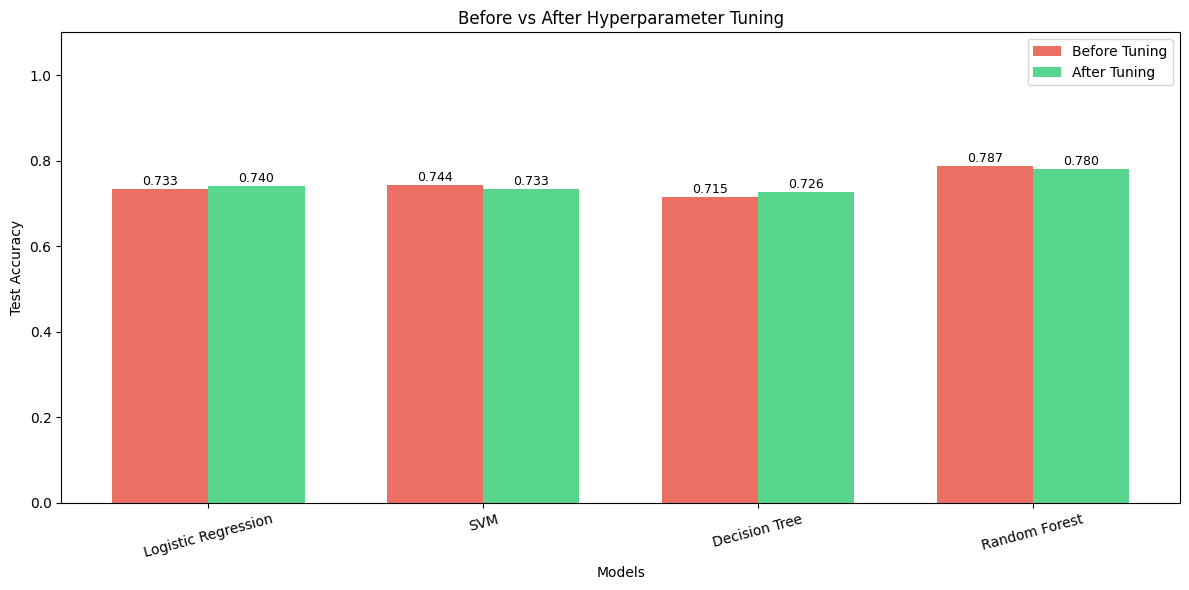

In [32]:
# comparing before and after tuning
tuned_results_df = pd.DataFrame(tuned_results)
print("\n" + "="*70)
print("  After Hyperparameter Tuning")
print("="*70)
print(tuned_results_df.to_string(index=False))

model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
before_acc = results_df['Test Accuracy'].values
after_acc = tuned_results_df['Test Accuracy'].values

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.35
bars1 = ax.bar(x - width/2, before_acc, width, label='Before Tuning', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, after_acc, width, label='After Tuning', color='#2ecc71', alpha=0.8)
ax.set_xlabel('Models')
ax.set_ylabel('Test Accuracy')
ax.set_title('Before vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15)
ax.legend()
ax.set_ylim(0, 1.1)

# adding accuracy values on top of bars
for bar in bars1:
    ax.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in bars2:
    ax.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

### 7.2 Feature Importance & Optimal Feature Count

Let's check which features matter the most and if we can get better accuracy by using fewer features.

Feature Importance:
                 Feature  Importance
           relationships    0.171251
 age_last_milestone_year    0.100465
              milestones    0.091887
       funding_total_usd    0.089707
  age_first_funding_year    0.077078
age_first_milestone_year    0.076618
        avg_participants    0.074152
   age_last_funding_year    0.068159
                latitude    0.057017
               longitude    0.052566
               is_top500    0.030945
          funding_rounds    0.029928
              has_roundD    0.010696
              has_roundB    0.010546
              has_roundA    0.010399
                  has_VC    0.010300
           is_otherstate    0.010031
              has_roundC    0.008402
                   is_CA    0.006501
               has_angel    0.004849
                   is_MA    0.003206
                   is_NY    0.003064
                   is_TX    0.002234


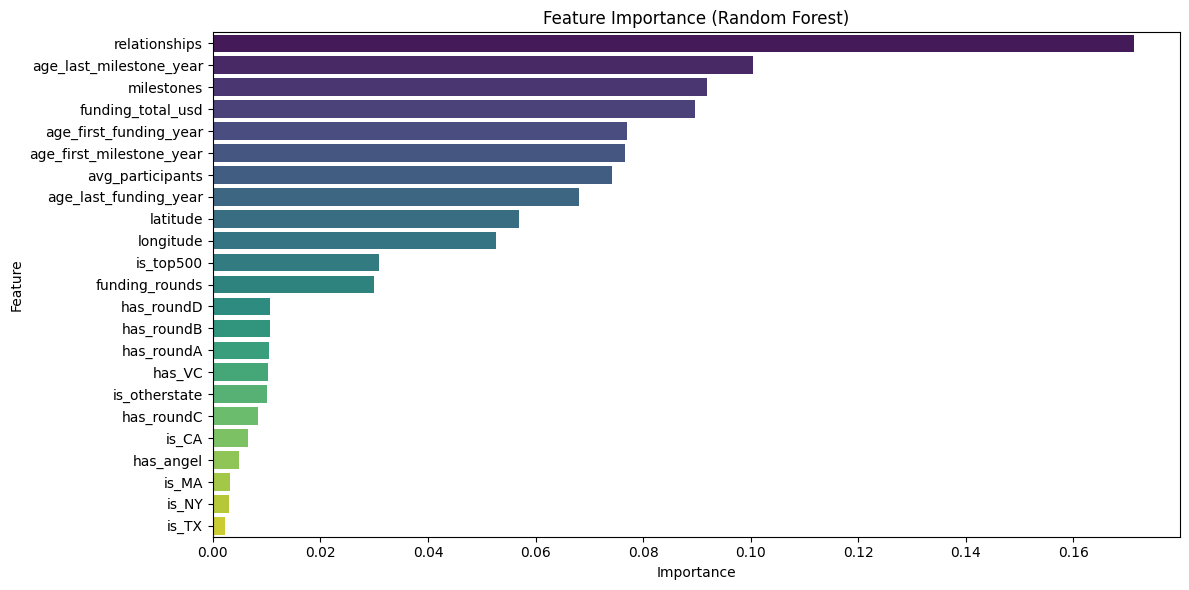

In [33]:
# lets see which features are most important according to random forest
best_rf = rf_grid.best_estimator_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance.to_string(index=False))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

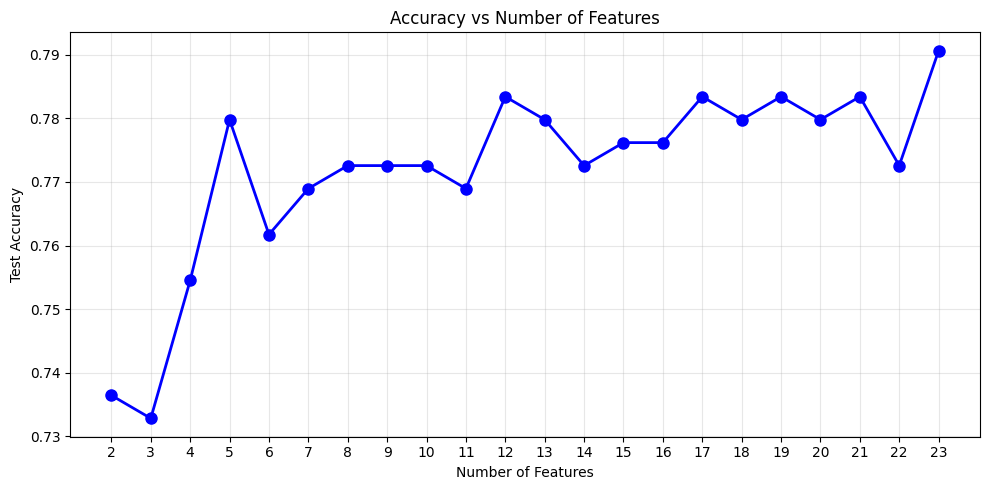


Best number of features: 23
Best accuracy: 0.7906
Features to use: ['relationships', 'age_last_milestone_year', 'milestones', 'funding_total_usd', 'age_first_funding_year', 'age_first_milestone_year', 'avg_participants', 'age_last_funding_year', 'latitude', 'longitude', 'is_top500', 'funding_rounds', 'has_roundD', 'has_roundB', 'has_roundA', 'has_VC', 'is_otherstate', 'has_roundC', 'is_CA', 'has_angel', 'is_MA', 'is_NY', 'is_TX']


In [34]:
# testing how accuracy changes with different number of features
# starting from most important and adding one by one
sorted_features = feature_importance['Feature'].tolist()
feature_counts = []
accuracies = []

for n_features in range(2, len(sorted_features) + 1):
    selected = sorted_features[:n_features]
    X_tr = X_train[selected]
    X_te = X_test[selected]
    rf_temp = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
    rf_temp.fit(X_tr, y_train)
    acc = accuracy_score(y_test, rf_temp.predict(X_te))
    feature_counts.append(n_features)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(feature_counts, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Features')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Number of Features')
plt.grid(True, alpha=0.3)
plt.xticks(feature_counts)
plt.tight_layout()
plt.show()

optimal_n = feature_counts[np.argmax(accuracies)]
print(f"\nBest number of features: {optimal_n}")
print(f"Best accuracy: {max(accuracies):.4f}")
print(f"Features to use: {sorted_features[:optimal_n]}")

## 8. Final Model & Saving

Building the final model with only the best features and saving it as a pickle file so we can use it in our Flask API.

  FINAL MODEL

  Final Random Forest
  Train Accuracy : 0.9582
  Test Accuracy  : 0.7906
  Precision      : 0.7960
  Recall         : 0.7906
  F1-Score       : 0.7766

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        98
           1       0.78      0.94      0.85       179

    accuracy                           0.79       277
   macro avg       0.80      0.73      0.75       277
weighted avg       0.80      0.79      0.78       277



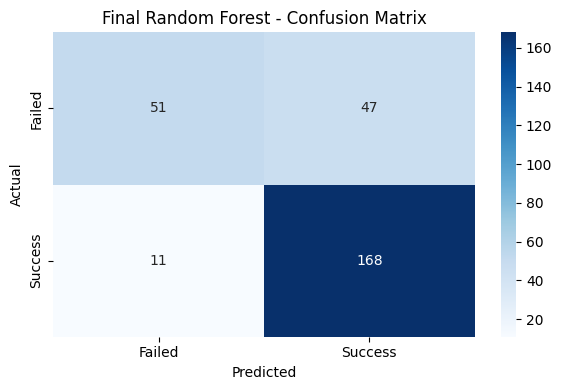


Features used (23):
  1. relationships
  2. age_last_milestone_year
  3. milestones
  4. funding_total_usd
  5. age_first_funding_year
  6. age_first_milestone_year
  7. avg_participants
  8. age_last_funding_year
  9. latitude
  10. longitude
  11. is_top500
  12. funding_rounds
  13. has_roundD
  14. has_roundB
  15. has_roundA
  16. has_VC
  17. is_otherstate
  18. has_roundC
  19. is_CA
  20. has_angel
  21. is_MA
  22. is_NY
  23. is_TX


In [35]:
# building final model with only the best features
optimal_features = sorted_features[:optimal_n]
X_final_train = X_train[optimal_features]
X_final_test = X_test[optimal_features]

final_model = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
final_model.fit(X_final_train, y_train)

print("="*50)
print("  FINAL MODEL")
print("="*50)
final_results = evaluate_model(final_model, X_final_train, X_final_test, y_train, y_test, "Final Random Forest")

print(f"\nFeatures used ({len(optimal_features)}):")
for i, feat in enumerate(optimal_features, 1):
    print(f"  {i}. {feat}")

In [36]:
# saving the model so we can use it in the flask app
model_data = {
    'model': final_model,
    'scaler': scaler,
    'features': optimal_features,
    'all_features': X.columns.tolist()
}

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved as 'random_forest_model.pkl'!")
print(f"\nDetails:")
print(f"  Algorithm: Random Forest")
print(f"  Best params: {rf_grid.best_params_}")
print(f"  Features: {len(optimal_features)}")
print(f"  Test Accuracy: {final_results['Test Accuracy']:.4f}")

Model saved as 'random_forest_model.pkl'!

Details:
  Algorithm: Random Forest
  Best params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
  Features: 23
  Test Accuracy: 0.7906
